# Time-Series Warm-up

To start off, let's stretch our time series legs and use some of the code we learned in the previous class. In particular, we'll use what we've learned to visualize hourly patterns in the price and volume of Bitcoin.

## 1. Import the required libraries and dependencies

In [39]:
# Import the required libraries and dependencies
import pandas as pd
import hvplot.pandas
from pathlib import Path
import holoviews as hv
import matplotlib.pyplot as plt

## 2. Read in the `bitcoin_hourly` CSV file, and prepare the data.

In [2]:
# Read csv file as DataFrame, with datetime index as the column `date` (for HVPlot)
data_path = Path("../Resources/bitcoin_hourly.csv")
df = pd.read_csv(
    data_path,
    infer_datetime_format=True,
    parse_dates=True,
    index_col='date'
)

# Preview the dataset
df.head()

,close,volume
date,,
2017-08-17 05:00:00,4315.32,23.234916
2017-08-17 06:00:00,4324.35,7.229691
2017-08-17 07:00:00,4349.99,4.443249
2017-08-17 08:00:00,4360.69,0.972807
2017-08-17 09:00:00,4444.00,10.763623


## 3. Plot volume in a line plot using `hvplot`.

In [9]:
# Plot volume by using hvplot to get a sense of what's typical volume for the cryptocurrency.
# plot_bitcoin_volume = (df.volume.groupby(df.index.date).sum()).hvplot.line(
plot_bitcoin_volume = df.hvplot.line(
    x='date',y='volume',
    title="Bitcoin Hourly Volume"
)
plot_bitcoin_volume

:Curve   [date]   (volume)

## 4. Use Pandas `groupby` and the `weekofyear` function on the `datetime` index to create a `hvplot` bar plot of the data. 

In [14]:
# Use groupby and the weekofyear function on the datetime index to create a hvplot bar plot of the data
df_bitcoin_week = df.groupby(df.index.weekofyear).mean()
df_bitcoin_week.index.name = 'weekofyear'
df_bitcoin_week

df_bitcoin_week.hvplot.bar(
    x='weekofyear',y='volume',
    title='Average Bitcoin Volume by Week of the Year'
)

/var/folders/p5/c9sy26l537975_39p28mtglh0000gn/T/ipykernel_379/3002503943.py:2: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df_bitcoin_week = df.groupby(df.index.weekofyear).mean()


:Bars   [weekofyear]   (volume)

## 5. Group the the `datetime` index hour and plot average prices and volume by hour, for each of the 24 hours in a day.

<AxesSubplot: xlabel='hourofday', ylabel='Volume'>

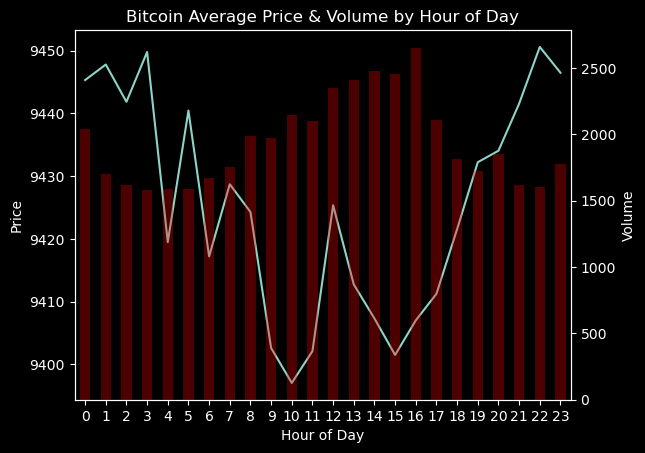

In [63]:
# Plot hourly trends in prices and volume for the cryptocurrency
df_bitcoin_hour = df.groupby(df.index.hour).mean()
df_bitcoin_hour.index.name = 'hourofday'
df_bitcoin_hour

# Plot price and volume of bitcoin
# Create figure and axis
fig, ax1 = plt.subplots()
# Plot price on left y-axis
df_bitcoin_hour['close'].plot(
    ax=ax1, ylabel='Price', xlabel='Hour of Day',
    title='Bitcoin Average Price & Volume by Hour of Day')
# Create 2nd y-axis on right side
ax2 = ax1.twinx()
# Plot volume to y-axis on right side
df_bitcoin_hour['volume'].plot.bar(
    ax=ax2, ylabel='Volume',
    color='red', alpha=0.3)



## 6. Sentiment Analysis
Elon Musk is known for many things, just one of them being the occasional irreverent post on his twitter feed. Below, use hvPlot and DateTime slicing to take a look at a couple days in which Musk posted commentary on Bitcoin. 

* Using datetime indexing, slice the volume and price DataFrame to one day before and after Jan 29, 2021, when Elon Musk added the hashtag #bitcoin to his Twitter bio.

* Did Musk's posts appear to move the market for the cryptocurrency? If so, did it move prices, or just volume?

<AxesSubplot: xlabel='date'>

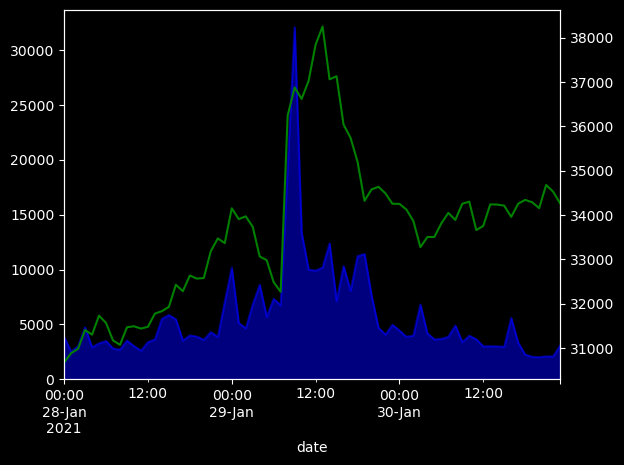

In [74]:
# Slice to one day before and after Jan 29, 2021 (When Elon Musk added the hashtag #bitcoin to his Twitter bio.)
start = '2021-01-28'
end = '2021-01-30'
df_bitcoin_elon = df.loc[start:end]

fig, ax1 = plt.subplots()
df_bitcoin_elon['volume'].plot.area(
    ax=ax1, color='blue', alpha=0.5
)
ax2 = ax1.twinx()
df_bitcoin_elon['close'].plot(
    ax=ax2, color='green'
)
